<center><img src=img/MScAI_brand.png width=70%></center>

# Computational Complexity


Computational efficiency is important! 

Computer scientists realised long ago that the efficiency of an algorithm isn't really well-measured by measuring the "wall clock time" it takes to execute.

We can reduce runtime by buying a faster computer, faster disk, or a better network connection, or rewriting the same algorithm in a different language, but that doesn't change the inherent time complexity of the algorithm.


Also, algorithms run on different-sized inputs. When inputs are small, even inefficient algorithms are instantaneous.

Instead, what is important is **computational complexity**, defined as: **how quickly the runtime increases as input gets arbitrarily large**.



A typical scenario: we run our algorithm with a small input file. It takes 1s to read in the data and 1s to process it. Then we run it on a larger input file. It takes 10m to read in the data, and 3 weeks to process it. The real issue here is the growth in processing from 1s to 3 weeks. We want to ignore the time spent reading the data.

### Assumptions

* A program consists of idealised "instructions" 
* There may be several types of instructions, e.g. multiplying two numbers, or checking for integer equality
* Some may be slower than others, but only by a **constant factor**;
* If one instruction is slower than another by a factor that **depends on program input size**, it is not an instruction -- we have to see it as composed of multiple instructions.

With these assumptions, we can write the runtime as the number of instructions -- a formula in $n$, the size of the input.

* To calculate the row-sum (sum of each row) of a square matrix ($n$ rows and $n$ columns):

In [2]:
def row_sum(M):
    R = []
    for L in M:
        R.append(sum(L))
    return R

* Create an empty list: 1
* Loop $n$ times:
  * Each loop: `sum` requires $n$ look-ups and $n$ additions,  and there is 1 append: $2n+1$ 
  * Loop total: $n(2n+1)$
* Total $2n^2+n+1$

Notice that `sum(L)` is not an instruction, because its runtime depends on the size of the `row_sum` input `M`. Instead, `sum` is composed of multiple instructions.

In [ ]:
def sum(x):
    s = 0 
    for xi in x:
        s += xi
    return s

In [1]:
def example(M):
    s = 0
    for i in range(len(M)):
        s += sum([4, 5, 6])
    return s

Here, `sum([4, 5, 6])` does not depend on the size of `M`, so it just counts as 3 look-ups + 3 additions.

### Worst-case

In computational complexity, if the number of instructions could vary (for fixed input size), we usually consider the **worst-case**. This takes care of situations where the algorithm can exit early for a special case or an error: we don't want to count those when measuring complexity.

(There are situations where we'll consider average-case as well, see later.)

* E.g. to check that a given element exists in a list of length $n$:

In [45]:
def element_exists(L, y):
    for x in L: 
        if x == y: return True
    return False

We have to look at all $n$ elements (worst-case). We'll have to look up $n$ items and make $n$ comparisons, so we'll execute $2n$ instructions.

### Asymptotic runtime

"Asymptotic behaviour" means something like "behaviour for arbitrarily large values". In computational complexity, we  only care about the number of instructions executed for large $n$.

How large? 

"Arbitrarily large". For small $n$, the number is probably dominated by setup or reading input, and anyway for small $n$ the program will be fast anyway, so we just don't care about runtime in the first place.

So the runtime is the number of instructions -- a formula in $n$. Now, we are going to argue that in that formula, for large $n$, only the **fastest-growing term** in $n$ matters. 

Let's look at the growth of a few simple terms.

In [7]:
import math
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams.update({'font.size': 14})

In [41]:
ns = range(2, 21)
growths = {
    "constant": lambda n: 1,
    "logarithmic": lambda n: math.log(n),
    "linear": lambda n: n,
    "log-linear": lambda n: n * math.log(n),
    "quadratic": lambda n: n ** 2
}

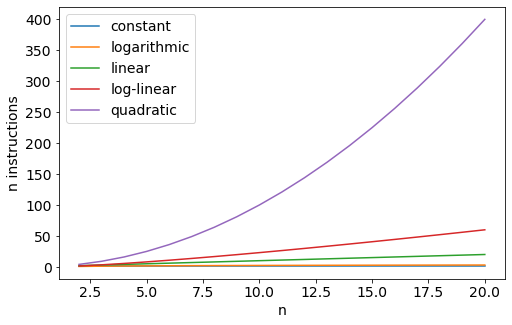

In [42]:
for growth in growths:
    plt.plot(ns, [growths[growth](n) for n in ns], 
             label=growth)
plt.legend(); plt.xlabel("n"); 
plt.ylabel("n instructions");

What we see is a huge discrepancy between terms even for small $n$.

It doesn't matter if we execute 1000$\times$ more instructions in one algorithm than another. Consider `1000*linear`, below.

It also doesn't matter if one algorithm does a lot of extra setup that another doesn't. Consider `100000+linear`, below. 



The `quadratic` function is still far worse than both even for this small $n=2000$.

In [43]:
ns = range(2, 2001)
growths = {
    "linear": lambda n: n,
    "100000+linear": lambda n: n + 100000,
    "1000*linear": lambda n: n * 1000,
    "quadratic": lambda n: n ** 2
}

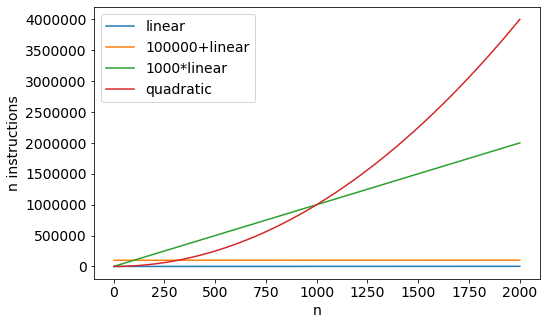

In [44]:
for growth in growths:
    plt.plot(ns, [growths[growth](n) for n in ns], 
             label=growth)
plt.legend(); plt.xlabel("n"); 
plt.ylabel("n instructions");

It also doesn't matter if one type of instruction is (say) 1000$\times$ slower than another: again, consider `1000*linear` above. This justifies our (surprising) assumption that we can treat all instructions as equal.

And, e.g., `sum(range(1000))` counts as 2000 instructions, but this doesn't depend on the size of the input $n$.

Therefore, for large $n$, the **fastest-growing term** dominates the number of instructions.

### "Big O" notation

We **ignore** all slow-growing terms. The "Big O" notation ("the order of complexity") does just this:

* Write the total number of instructions as a function of $n$, e.g. $2n^2 + n + 2$
* Drop all but the fastest-growing term and drop its coefficient, and write in "big O" notation: $O(n^2)$.



There are a few common "Big O" values. Here they are from slowest- to fastest-growing.

* constant, $O(1)$
* logarithmic, $O(\log(n))$
* linear, $O(n)$
* log-linear aka quasi-linear, $O(n\log(n))$
* quadratic, $O(n^2)$

### Examples

* We already argued that to check a particular item exists in a list of length $n$, we need $2n$ instructions. That is linear, $O(n)$.

* Calculating the list of row-sums of a square matrix of size $n$ is quadratic, $O(n^2)$.


* Sorting a list of length $n$ takes $O(n\log(n))$. 

This is a classic example. It doesn't matter what algorithm you use, it can't be better than $O(n\log(n))$. (There are algorithms which are much worse, e.g. **bubble sort**.) Thus, it is justified to talk about the complexity of the **problem**, not just the complexity of the **algorithm**.

### Rules of thumb

* Every for-loop multiplies by a factor of $n$, e.g. this is $O(n^3)$:

```python
for i in range(n):
    for j in range(n):
        for k in range(n):
            # do something
```

* Reading input data can usually be ignored. 

Reading an input file is typically $O(n)$, i.e. linear in the number of lines or file size. We know that **processing won't be sub-linear**, so the time spent reading data won't exceed it, so it can be ignored.

* "comparison-based sorting algorithms like Merge sort take only Big O $O(n \log(n))$ and so you can sort just about any amount of data in a feasible time" (https://www.gwern.net/Complexity-vs-AI). 

Why does $O(n \log(n))$ imply that it is feasible? 

It's because $O(n\log(n))$ is only a little slower than $O(n)$ itself. We already assume that we can read the data in feasible time, otherwise the question of sorting it would not arise. Reading it is $O(n)$. So if we can read it into RAM, we can sort it. If our RAM is not big enough, the sorting algorithm will be bottlenecked by *thrashing*.

We must start with a clear definition of $n$. E.g. what is the complexity of summing all elements in a square matrix?

* Define $n$ as number of elements in the matrix: then **complexity is linear**
* Define $n$ as number of rows, so shape is $(n, n)$: then **complexity is quadratic**

So, we should always say, eg, "complexity is $O(n^2)$ **with respect to** $n$, the number of nodes".


Sometimes we might have multiple inputs, e.g. two arrays of sizes $n$ and $m$, or a 2D array of size $n\times m$. In these cases we might need $O()$ expressions in both $n$ and $m$, e.g. calculating the sum of an array of shape $(n, m)$ is $O(nm)$. Alternatively we might just (conservatively) take $n$ to be the larger of $n$ and $m$.

The most important difference in practice is between linear and log-linear algorithms and quadratic. 

In a linear algorithm, "you took some input and did something simple to each element" (Accidentally Quadratic, http://accidentallyquadratic.tumblr.com/post/113840433022/why-accidentally-quadratic).

A quadratic algorithm can occur if we need to traverse the whole input once for every element of the input, for example bubble sort. And it can occur with graphs of $n$ nodes, which give $(n \times n)$ adjacency matrices.

$O(\log n)$ often occurs when working with trees, because a tree of $n$ nodes has $\log n$ levels. For example, given any node, it is $O(\log n)$ to traverse to the root.

<center><img src=img/tree_size_depth_leaves.png width=35% ></center>

$O(n\log n)$ often occurs when we put our data into a tree structure, because each element in the data ($n$) has to be put in ($\log n$). We might do that to improve a quadratic algorithm.


Another place $O(\log n)$ occurs is in binary search algorithms. 


Exponential and factorial algorithms occur rarely and are to be avoided if possible!

### Space complexity

Space complexity is really the same concept, applied to memory instead of time. 

The space complexity of a data structure is defined as: how the amount of memory taken up by the structure grows, as the "input size" grows. 

For example, if we store a graph of $n$ nodes as an adjacency matrix, then the space complexity is $O(n^2)$ with respect to $n$, the number of nodes.

### Situations not governed by computational complexity

Suppose we are running a webserver. Every request that comes in is approximately the same, small, size. We don't care about asymptotic complexity. We **do** care about the setup time and the coefficients!

We only care about computational complexity if we're going to have large inputs. Someone once criticised me for using an $O(n^2)$ algorithm instead of $O(n)$ in a situation where we knew $n < 7$. You might say "well $6 < 6^2$, so yes the $O(n)$ will be faster". 

But remember that for small $n$ the assumptions break down: we can't ignore the coefficient or the "slow-growing" terms. The $O(n)$ algorithm required some constant-time setup.

### Example: Complexity of ML algorithms

* What is the complexity of linear regression?


* The **training** and the **prediction** algorithms are totally different!
* What is $n$?

* For **prediction**, we take in a vector $x$. We predict the output $\hat{y} = a + b_1x_1 + b_2x_2 + \ldots + b_nx_n$. 
* The only possible $n$ is the number of variables, i.e. `len(x)`. The calculation takes just $O(n)$.
  

* For **training**, we have an input dataset with $n$ variables, and $m$ examples, and (suppose we use gradient descent) we iterate for some number of iterations $s$. It should be clear that our complexity will be **linear** in $m$ and in $n$ and in $s$, so it is $O(nms)$. Depending on what we are trying to achieve, we could just call that e.g. $O(m)$ (treating $n$ and $s$ as fixed).

Caveat: we'll set $s$ in a way that may depend a bit on the difficulty of the problem!